# Keep the [NB Documentation](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) open throughout the exercise

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('data/sms_spam.csv')

In [3]:
data.sample(10)

,label,msg
1940,spam,More people are dogging in your area now. Call...
975,ham,Eh u send wrongly lar...
2331,ham,Long beach lor. Expected... U having dinner now?
5301,ham,At WHAT TIME should i come tomorrow
3071,ham,I'm now but have to wait till 2 for the bus to...
169,ham,Great escape. I fancy the bridge but needs her...
4805,ham,"Er, hello, things didn���t quite go to plan ��..."
407,ham,All was well until slightly disastrous class t...
3,ham,U dun say so early hor... U c already then say...
2121,ham,"Argh my 3g is spotty, anyway the only thing I ..."


In [4]:
# let's look at the counts of spam and ham
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

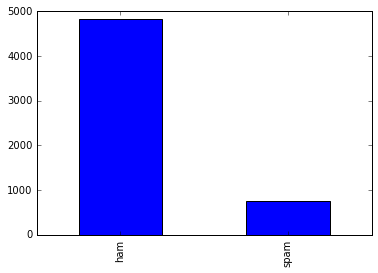

In [5]:
# make a bar chart for spam and ham
data.label.value_counts().plot(kind='bar')

In [6]:
data.describe()

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# now we need to convert our label to a categorical variable for the model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
msg      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [8]:
# make our y column
data['y'] = pd.Categorical(data['label'])

In [9]:
data.sample(5)

,label,msg,y
2147,ham,So can collect ur laptop?,ham
735,ham,Leaving to qatar tonite in search of an opport...,ham
2072,ham,Good night my dear.. Sleepwell&amp;Take care,ham
1112,ham,"Awesome, think we can get an 8th at usf some t...",ham
1210,ham,His bday real is in april .,ham


## Converting text to vectors

`sklearn` comes with many built-in feature extraction and manipulation tools. For dealing with text data, there is the  `sklearn.feature_extraction.text` module, which contains the **`CountVectorizer`** and the `TfidfVectorizer`.

### `CountVectorizer`

This class transforms an array-like (list, dataframe column, array) of strings into a matrix where each column represents a token (word or phrase) and each row represents the sample.

For example, if we had a two-element array ["Hello good day", "Good day to you"], we would create a matrix with 2 rows (one for each sample) and 5 columns (one for every unique word). The matrix would look like this:

hello|good|day|to|you
--|--|--|--|--
1|1|1|0|0
0|1|1|1|1

The `CountVectorizer` (and most feature extraction methods in sklearn) follows a very simple interface:
- `fit` takes a dataset and learns the features it's trying to extract. In this case that means that the algorithm learns the vocabulary of all samples
- `transform` takes a dataset and produces the matrix as described above, based on the vocabulary (or feature elements) it learned.
- `fit_transform` combines the two steps at once.

For example, you may want to fit a vocabulary to a training set, transform the training set to train a model and then continually transform any new incoming examples you want to classify. You will generally only perform the fit step once but the transform step many times for any new datasets.

## First we will convert the text into feature vectors which can be used for machine learning purposes.

We will use the scikit function of CountVectorizer to 'convert text into a matrix of token counts'

 http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# let's look at a simple example
train_simple = ['call you tonight',
                'Call me a cab',
                'please call me... PLEASE!']
train_labels = ['not_desperate',
                'not_desperate',
                'desperate']
# ignore in case ppl used weird text like smileys or foreign languages
vect = CountVectorizer(decode_error='ignore')
vect.fit(train_simple)
vect.get_feature_names()

[u'cab', u'call', u'me', u'please', u'tonight', u'you']

In [12]:
# by default CountVectorizer does ngram of 1
# we'll use unigrams for the rest of this exercise

# transform to make ready for dataframe
vect_trans = vect.transform(train_simple)
# let's look at the dataset
vect_trans.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [13]:
# put it all in a dataframe
df = pd.DataFrame(vect_trans.toarray())
df.head()

,0,1,2,3,4,5
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [14]:
# now let's add the labels
df['labels'] = train_labels

In [15]:
df.head()

,0,1,2,3,4,5,labels
0,0,1,0,0,1,1,not_desperate
1,1,1,1,0,0,0,not_desperate
2,0,1,1,2,0,0,desperate


## Now we will fit NB with sklearn

[Multinomial NB Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

- alpha (float): this prevents us from getting 0 probabilities for a rarely occuring class, typically we want 0<alpha<=1
- fit_prior (bool): whether to learn the class probabilities based on the training data (usually leave this as True)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [17]:
# becareful since labels is a special name in pandas
y, X = df['labels'], df.drop(['labels'], axis=1)

In [18]:
y

0    not_desperate
1    not_desperate
2        desperate
Name: labels, dtype: object

In [19]:
X

,0,1,2,3,4,5
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [20]:
# create NB model
nb = MultinomialNB()
nb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Now it's your turn to build a spam classifier!


## By now, I expect you know how to setup a proper experiment

1) Get the spam data in the proper format for analysis with NB

2) Setup CV

3) What accuracy can you achieve? Is this the right way to measure spam classification?

4) Test your model on classifying the following sentences:

`Free Viagra call today!` 

`I hope I get to see you tomorrow.`